In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Loading the Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.  Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In [2]:
import os
os.chdir('/home/sunil/Desktop/Great Lakes/supervised learning/day2')
df = pd.read_csv('banking_updated.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


**Input variables:**

1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Feature Engineering

In [4]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [5]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

### Visualizing the Data

In [8]:
import seaborn as sns

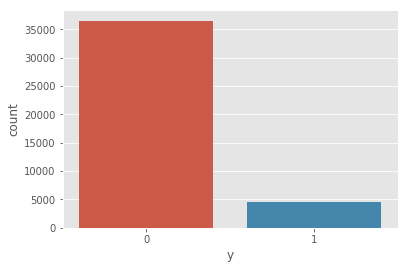

In [9]:
sns.countplot(x='y', data=df)

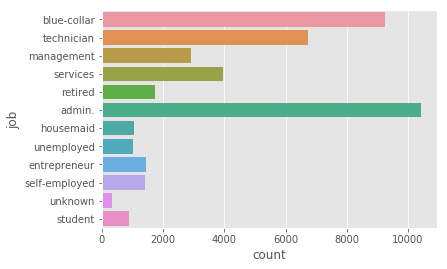

In [10]:
sns.countplot(y='job', data=df)

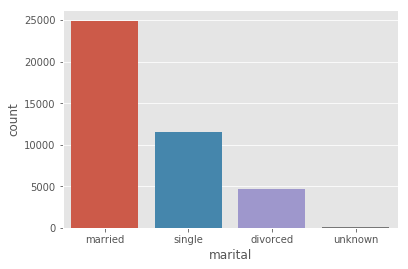

In [11]:
sns.countplot(x='marital', data=df)

In [12]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

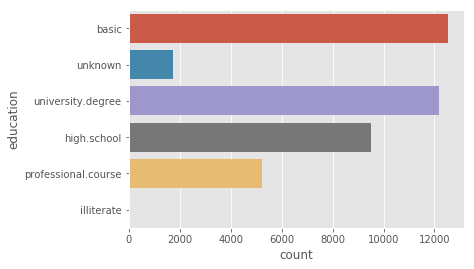

In [13]:
sns.countplot(y='education', data=df)

In [14]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Pre Processing
Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. `LabelEncoder` encode labels with value between 0 and n_classes-1

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
df.job = le.fit_transform(df.job)

In [17]:
df.marital = le.fit_transform(df.marital)

In [18]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [19]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [20]:
df.shape

(41188, 15)

In [21]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2
5,30,4,0,0,2,0,8,0,1,1.4,93.918,-42.7,4.961,5228.1
6,37,1,1,0,2,0,1,0,1,-1.8,92.893,-46.2,1.327,5099.1
7,39,1,0,0,2,0,1,0,1,-1.8,92.893,-46.2,1.313,5099.1
8,36,0,1,4,0,0,1,1,2,-2.9,92.963,-40.8,1.266,5076.2
9,27,1,2,0,2,0,2,1,0,-1.8,93.075,-47.1,1.410,5099.1


In [22]:
y = df.iloc[:,14]
y[0:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: y, dtype: int64

### Train and Test split
A general practice is to split your data into a training and test set. You train/tune your model with your training set and test how well it generalizes to data it has never seen before with your test set. 
We will make use of scikit learn’s `train_test_split` method to achieve this

In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [24]:
x_train.shape, y_train.shape

((32950, 14), (32950,))

In [25]:
x_test.shape, y_test.shape

((8238, 14), (8238,))

In [26]:
from imblearn.over_sampling import SMOTE

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3727
Before OverSampling, counts of label '0': 29223 

After OverSampling, the shape of train_X: (58446, 14)
After OverSampling, the shape of train_y: (58446,) 

After OverSampling, counts of label '1': 29223
After OverSampling, counts of label '0': 29223


### Training the model
We will make use of different classification algorithms to train this data set and will record the accuracy on test set.

#### Logistic Regression

In [30]:
model=LogisticRegression()

In [32]:
model.fit(X_train_res, y_train_res)

/home/sunil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
prediction=model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.773610099538723

In [35]:
prediction

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[5751 1574]
 [ 291  622]]
